In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [3]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [4]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 3,  4,  5,  0,  1, 10,  6,  8,  7]), tensor([9, 2]))

In [7]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [8]:
import torch.nn as nn

linear_model = nn.Linear(1,1)
linear_model(t_un_val)

tensor([[6.4529],
        [6.2365]], grad_fn=<AddmmBackward0>)

In [9]:
linear_model.weight

Parameter containing:
tensor([[0.9839]], requires_grad=True)

In [10]:
linear_model.bias

Parameter containing:
tensor([0.5104], requires_grad=True)

In [11]:
x = torch.ones(1)
linear_model(x)

tensor([1.4943], grad_fn=<AddBackward0>)

In [12]:
# 배치 입력 만들기
x = torch.ones(10, 1)
linear_model(x)

tensor([[1.4943],
        [1.4943],
        [1.4943],
        [1.4943],
        [1.4943],
        [1.4943],
        [1.4943],
        [1.4943],
        [1.4943],
        [1.4943]], grad_fn=<AddmmBackward0>)

In [14]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr = 1e-2
)

In [15]:
linear_model.parameters()

<generator object Module.parameters at 0x7fb9da75dbd0>

In [16]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.6653]], requires_grad=True), Parameter containing:
 tensor([-0.6791], requires_grad=True)]

In [17]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f"Validation loss {loss_val.item():.4f}")

In [18]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

In [50]:
training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 2.9340,Validation loss 3.0139
Epoch 1000, Training loss 2.9340,Validation loss 3.0139
Epoch 2000, Training loss 2.9340,Validation loss 3.0139
Epoch 3000, Training loss 2.9340,Validation loss 3.0139

Parameter containing:
tensor([[5.4101]], requires_grad=True)
Parameter containing:
tensor([-17.3968], requires_grad=True)


In [51]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr = 1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 151.3084,Validation loss 156.1766
Epoch 1000, Training loss 3.4313,Validation loss 2.7215
Epoch 2000, Training loss 2.9419,Validation loss 2.9792
Epoch 3000, Training loss 2.9340,Validation loss 3.0140

Parameter containing:
tensor([[5.4103]], requires_grad=True)
Parameter containing:
tensor([-17.3978], requires_grad=True)


In [52]:
seq_model = nn.Sequential(
            nn.Linear(1, 13),
            nn.Tanh(),
            nn.Linear(13, 1)
)

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [53]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [54]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [69]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
                                       ('hidden_linear', nn.Linear(1,8)),
                                       ('hidden_activation', nn.Tanh()),
                                       ('output_linear', nn.Linear(8, 1))
]))

In [70]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [71]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.3258], requires_grad=True)

In [72]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 196.1498,Validation loss 212.5611
Epoch 1000, Training loss 4.2196,Validation loss 3.8130
Epoch 2000, Training loss 1.7170,Validation loss 3.9985
Epoch 3000, Training loss 1.4869,Validation loss 3.8221
Epoch 4000, Training loss 1.4407,Validation loss 3.7170
Epoch 5000, Training loss 1.4230,Validation loss 3.6620
output tensor([[15.3766],
        [13.7055]], grad_fn=<AddmmBackward0>)
answer tensor([[13.],
        [15.]])
hidden tensor([[-0.0297],
        [-0.0066],
        [ 0.0062],
        [ 0.0097],
        [-0.0037],
        [ 0.0265],
        [ 0.0031],
        [-0.0268]])


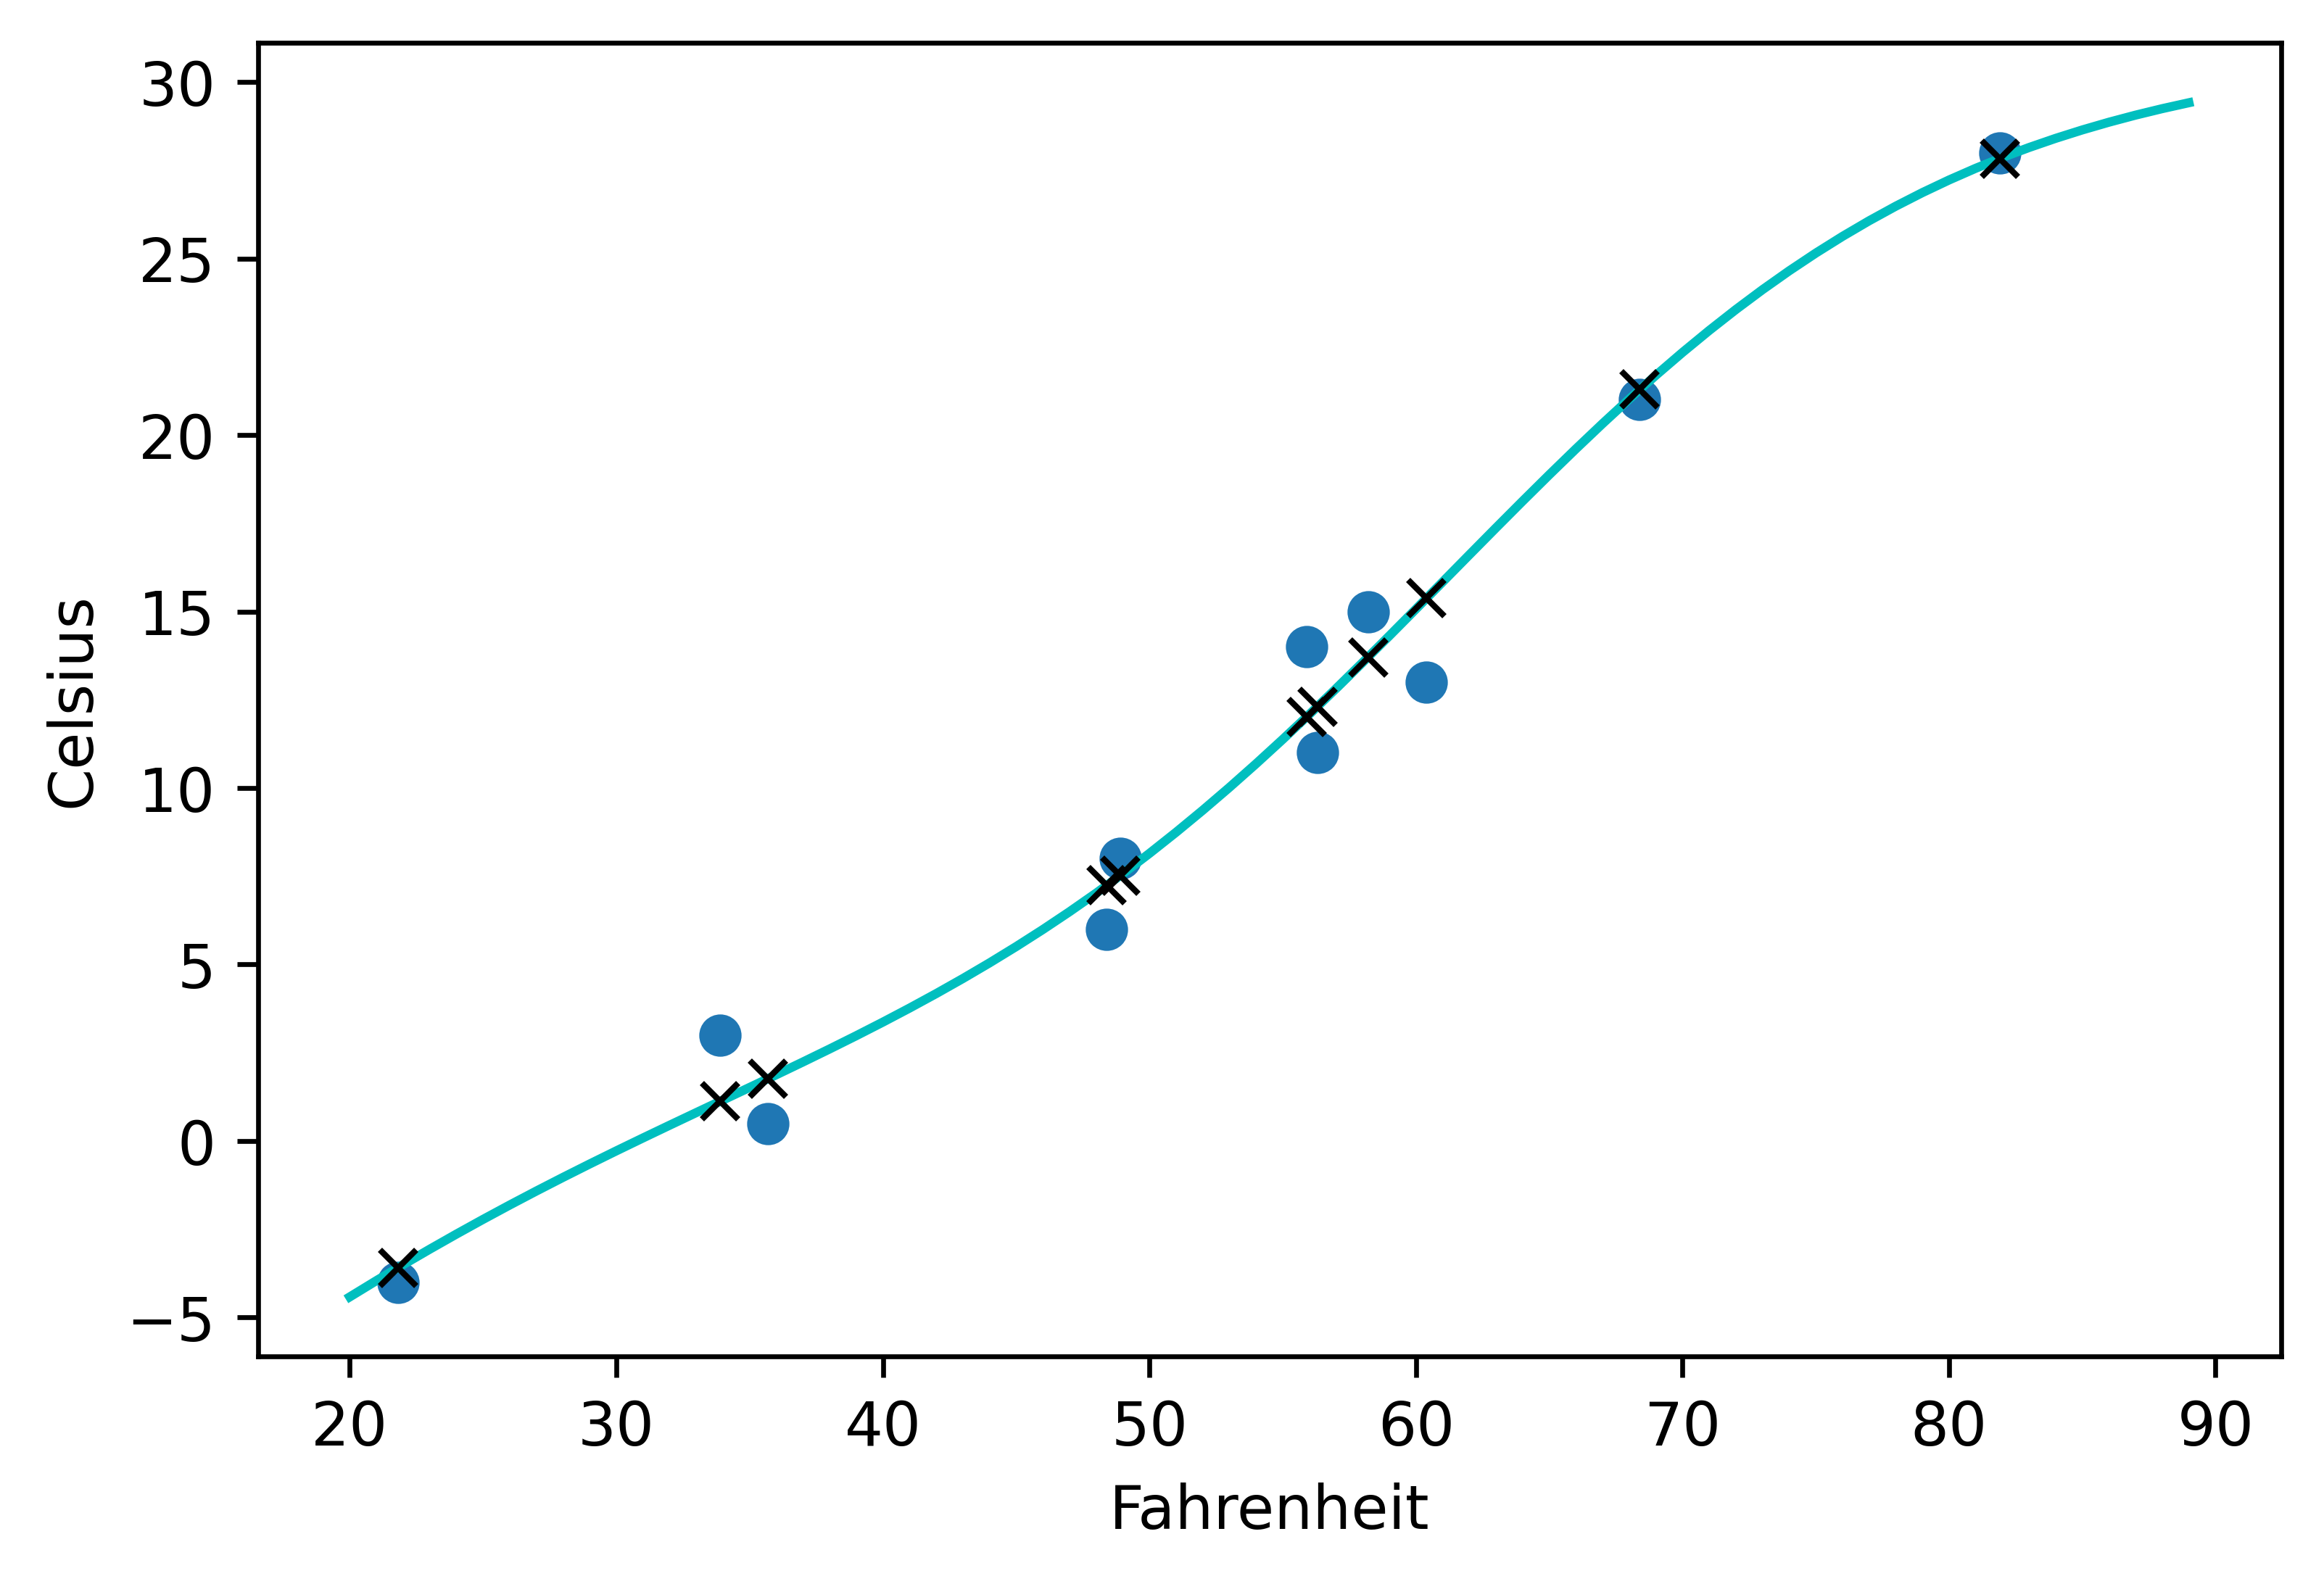

In [73]:
# 선형 모델과 비교하기
# 입력 데이터는 O로 출력 데이터는 X로 표기한 신경망 모델 그래프
# X축은 화씨 Y축은 섭씨
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')